# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data Preprocessing

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

In [6]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Handling string data

In [8]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [9]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


### Droping useless data

In [11]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## EDA

In [13]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

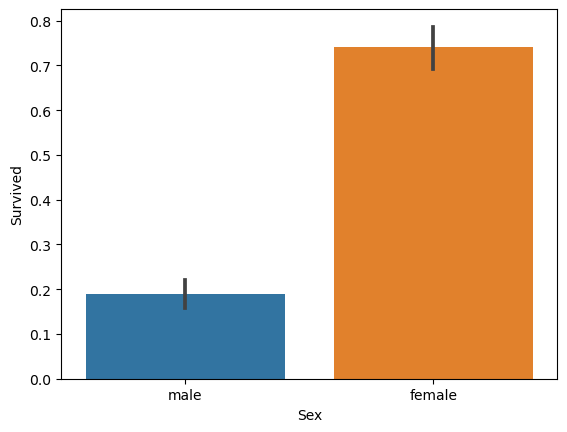

In [14]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

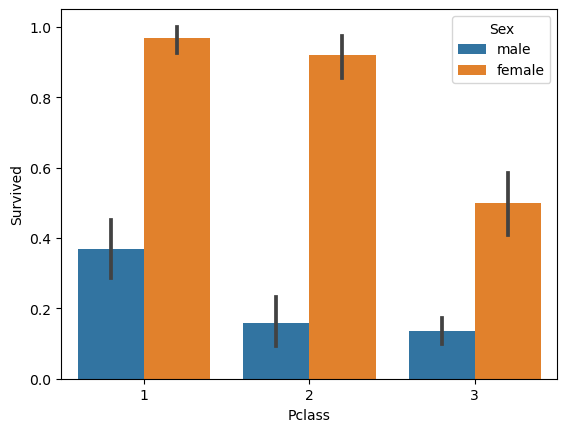

In [15]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) #hue: 범례

In [16]:
def get_category(age): #이 함수는 데이터프레임의 열을 받을거
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [17]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category) #apply의 디폴트는 한 열에대해서 인덱스가 내려가면서 대입

In [18]:
titanic_df['Age_cat']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age_cat, Length: 891, dtype: object

<Axes: xlabel='Age_cat', ylabel='Survived'>

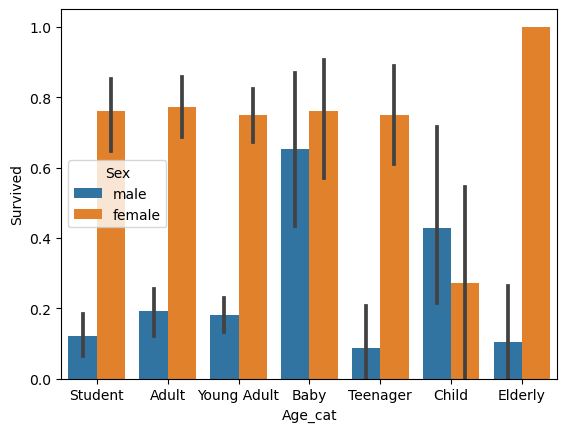

In [19]:
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df)

In [20]:
titanic_df.drop('Age_cat', axis=1, inplace=True)

### Three variables(Sex, Cabin, Age) showed somewhat difference between in each grouping, which means those are impactive variables in Modeling

### Category varibales -> numeric data (ダミー変数変換、인코딩)

In [23]:
from sklearn import preprocessing

def encode_features(dataDF): #데이터 프레임이 인자로 들어오겠네
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder() #빈 거 만들고
        le = le.fit(dataDF[feature]) # 학습시킬 데이터 넣고
        dataDF[feature] = le.transform(dataDF[feature]) # transform으로 예측(변환)
        
    return dataDF
titanic_df = encode_features(titanic_df)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


### Make into one function

In [25]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# Modeling

## 1. Upload train data again and divide into two sets(x[variables], y[label])

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


## 2. Split data into 8:2

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


## 3. Testing several models

### DecisionTress 모델

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=11) # 빈 객체 생성
dt_clf.fit(X_train , y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측
print(accuracy_score(y_test, dt_pred)) # 정확도 평가

0.7877094972067039


### RandomForest 모델

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=11) # 빈 객체 생성
rf_clf.fit(X_train , y_train) # 학습
rf_pred = rf_clf.predict(X_test) # 예측
print(accuracy_score(y_test, rf_pred)) # 정확도

0.8547486033519553


### Logstic Regression 모델

In [38]:
lr_clf = LogisticRegression(solver='liblinear') # 객체 생성, liblinear가 항상 좋다고는 보장 못 함. 여러가지 시도해봐야지
lr_clf.fit(X_train , y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
print(accuracy_score(y_test, lr_pred))

0.8659217877094972


### It doesn't mean Logistic Regression is the best due to the lack of cross_val and standarzation

### 왠지는 모르겠는데 Decision Tree 선택 후 교차검증

## 4. Cross Check(K_fold)

### 그냥 k fold로 검증한 dt_clf(DecisionTree)가 됨

In [43]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2) # K
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = kf)

print(scores)

print("Mean: {0:.4f}".format(scores.mean()))

[0.78212291 0.78651685 0.8258427  0.74157303 0.7247191 ]
Mean: 0.7722


### Stratified k fold로 검증한 dt_clf(DecisionTree)가 됨 (보통 분류 문제는 얘가 나음)

In [171]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)

print(scores)

print("Mean: {0:.4f}".format(scores.mean()))

[0.74301676 0.7752809  0.79213483 0.78651685 0.84269663]
Mean: 0.7879


## 5. GridSearchCV(Searching optimal hyperparameter for DecisionTree)

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]} # 하이퍼파라미터는 모델마다 다름. DecisionTree는 저 3개.

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5) #위의 파라미터와 k폴드(n=5) 설정
grid_dclf.fit(X_train , y_train) # 반복 학습

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_ # 최적의 경우의 수 대입


dpredictions = best_dclf.predict(X_test) # 예측
accuracy = accuracy_score(y_test , dpredictions) # 평가
print(f"{accuracy:.4f}")

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
0.8715


## 6. Predict with test data 

### Upload samle submission

In [107]:
example_df = pd.read_csv('./gender_submission.csv')
example_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
titanic_df = pd.read_csv('./titanic_test.csv')
titanic_df = transform_features(titanic_df)
titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1


### Prediction with LogisticRegression

In [94]:
lr_pred = lr_clf.predict(titanic_df) # 예측. 얘는 GridSearchCV 실행 안 함. 왤까?

In [92]:
prediction_df = pd.DataFrame(data=lr_pred, columns=['Survived'])
prediction_df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [96]:
passenger_list = range(892, 892 + len(prediction_df))
prediction_df['PassengerId'] = passenger_list
prediction_df

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [100]:
prediction_df = prediction_df[['PassengerId', 'Survived']]
prediction_df.to_csv('prediction_results(Logistic).csv', index=False)

### Using Optimized DecisionTreeModel(best_dclf)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

GS_pred = best_dclf.predict(titanic_df) # 예측
GSprediction_df = pd.DataFrame(data=GS_pred, columns=['Survived'])
GSprediction_df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [104]:
passenger_list = range(892, 892 + len(GSprediction_df))
GSprediction_df['PassengerId'] = passenger_list
GSprediction_df

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [109]:
GSprediction_df = GSprediction_df[['PassengerId', 'Survived']]
GSprediction_df
GSprediction_df.to_csv('GSprediction_results(GS).csv', index=False)